In [1]:
import pandas as pd
import sys
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

print("Path to dataset files:", path)

100%|██████████| 340k/340k [00:00<00:00, 52.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arjunbhasin2013/ccdata/versions/1


In [4]:
df = pd.read_csv(path + '/CC GENERAL.csv')

df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/arjunbhasin2013/ccdata/versions/1


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [7]:
df.duplicated().sum()

0

In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# plotting histogram for knowing the distribution of the data

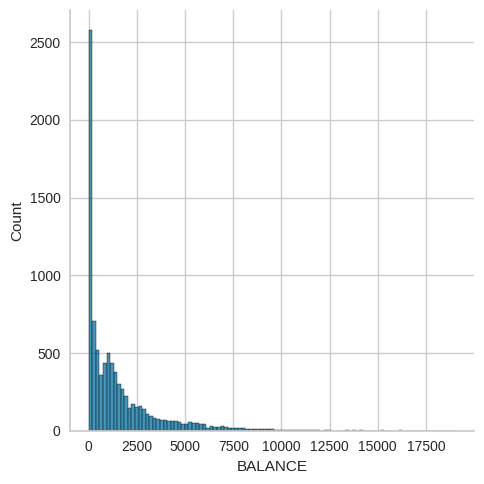

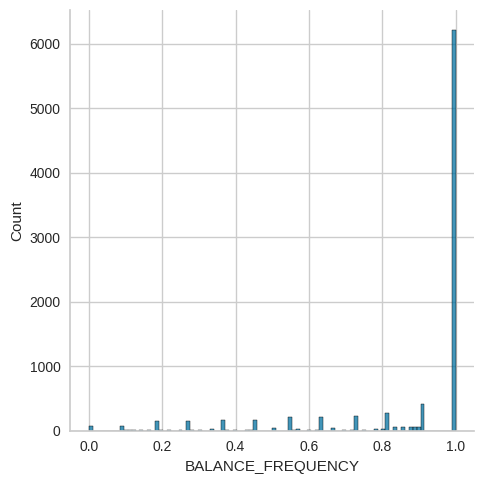

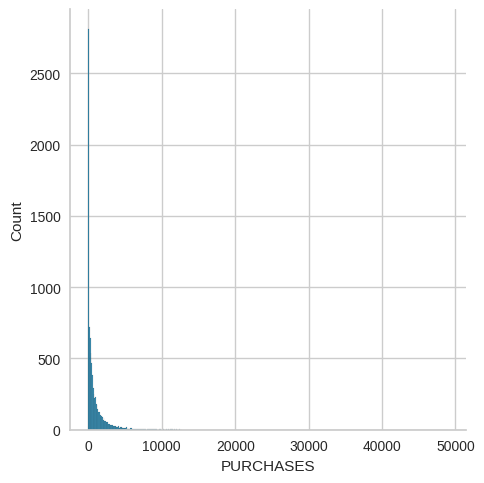

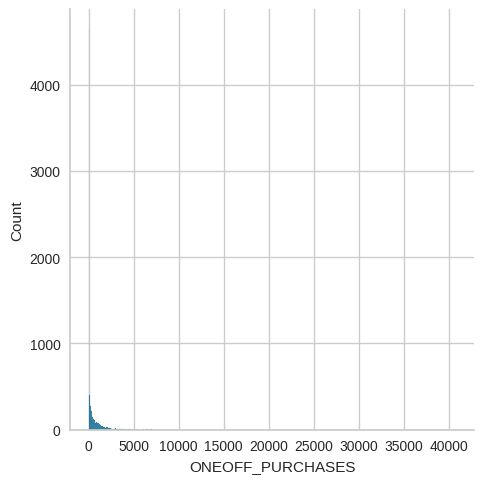

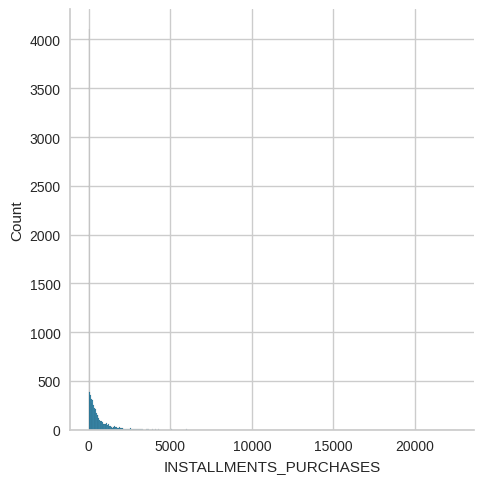

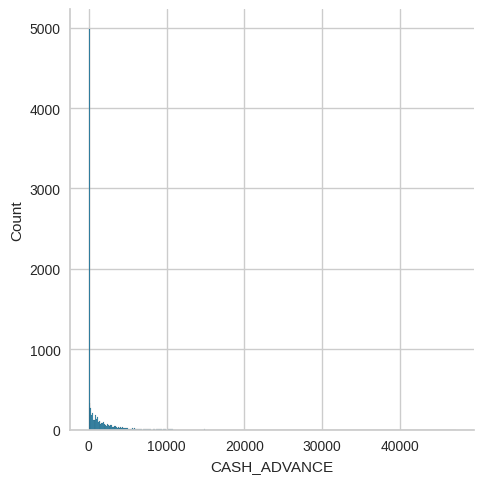

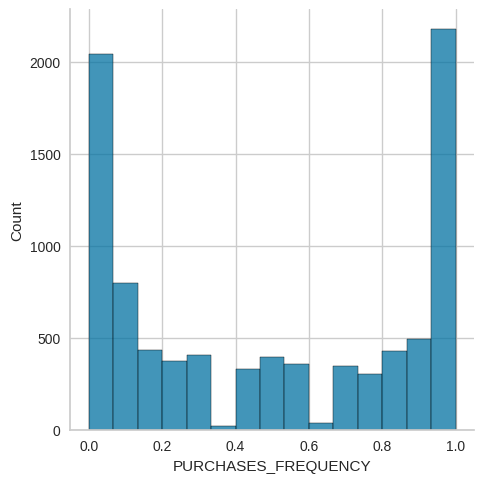

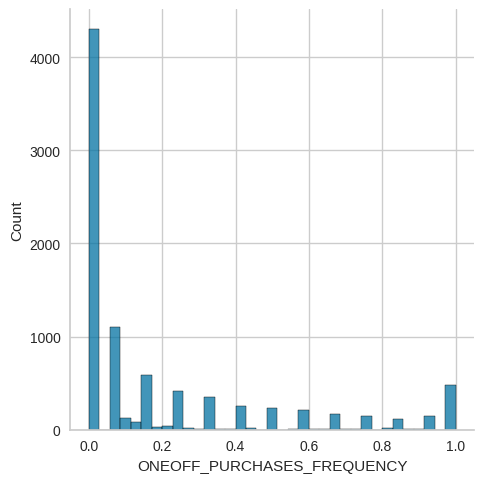

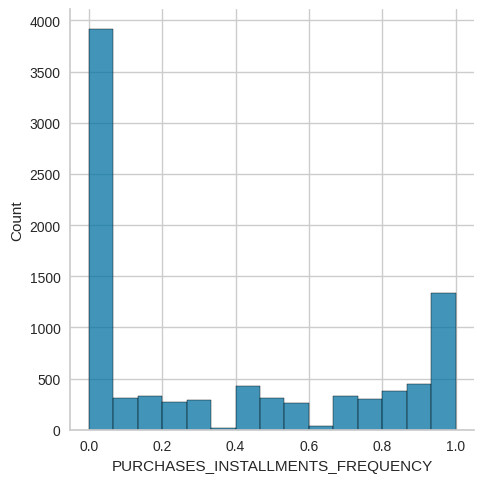

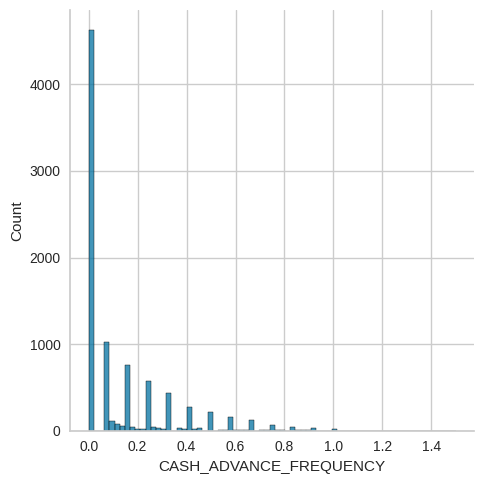

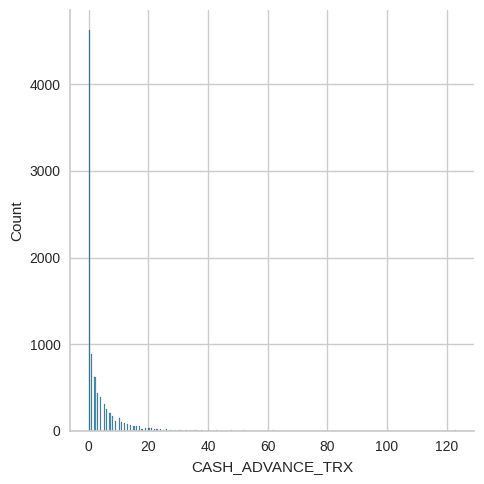

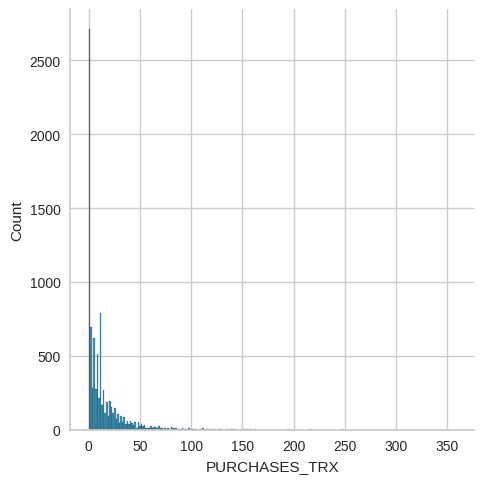

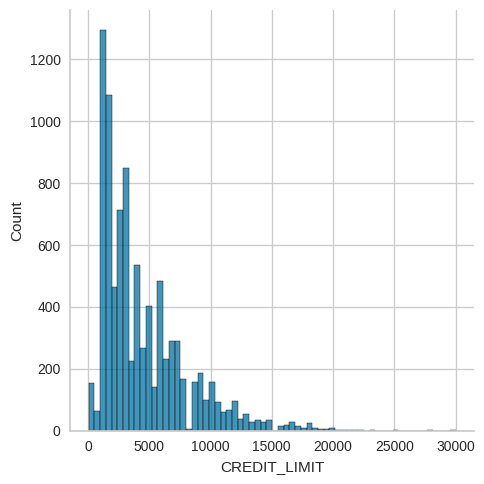

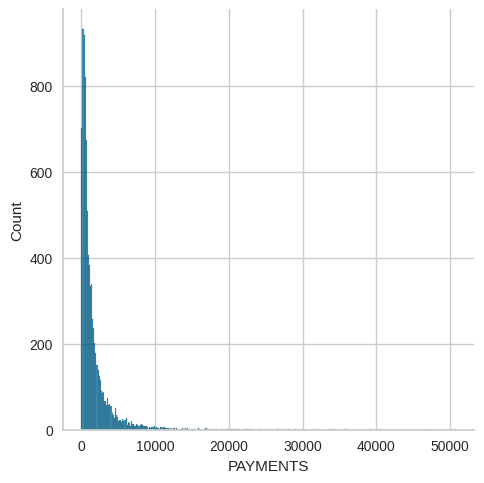

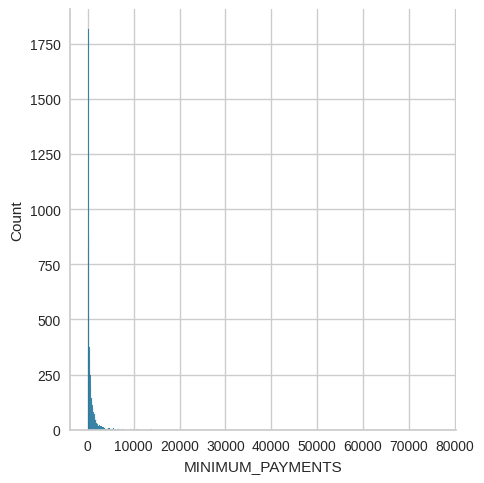

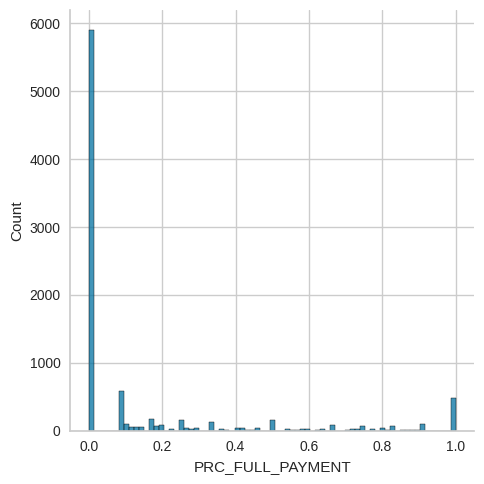

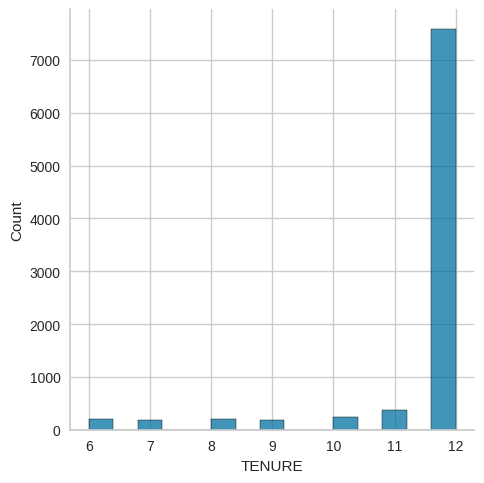

In [15]:
for col in dff:
    sns.displot(data=dff, x=col)

# Imputing missing data in column 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS'

In [16]:
dff['CREDIT_LIMIT'].fillna(value=dff['CREDIT_LIMIT'].median(), inplace=True)
dff['CREDIT_LIMIT'].isna().sum()

0

In [17]:
dff['MINIMUM_PAYMENTS'].fillna(value=dff['MINIMUM_PAYMENTS'].median(), inplace=True)
dff['MINIMUM_PAYMENTS'].isna().sum()

0

<Axes: >

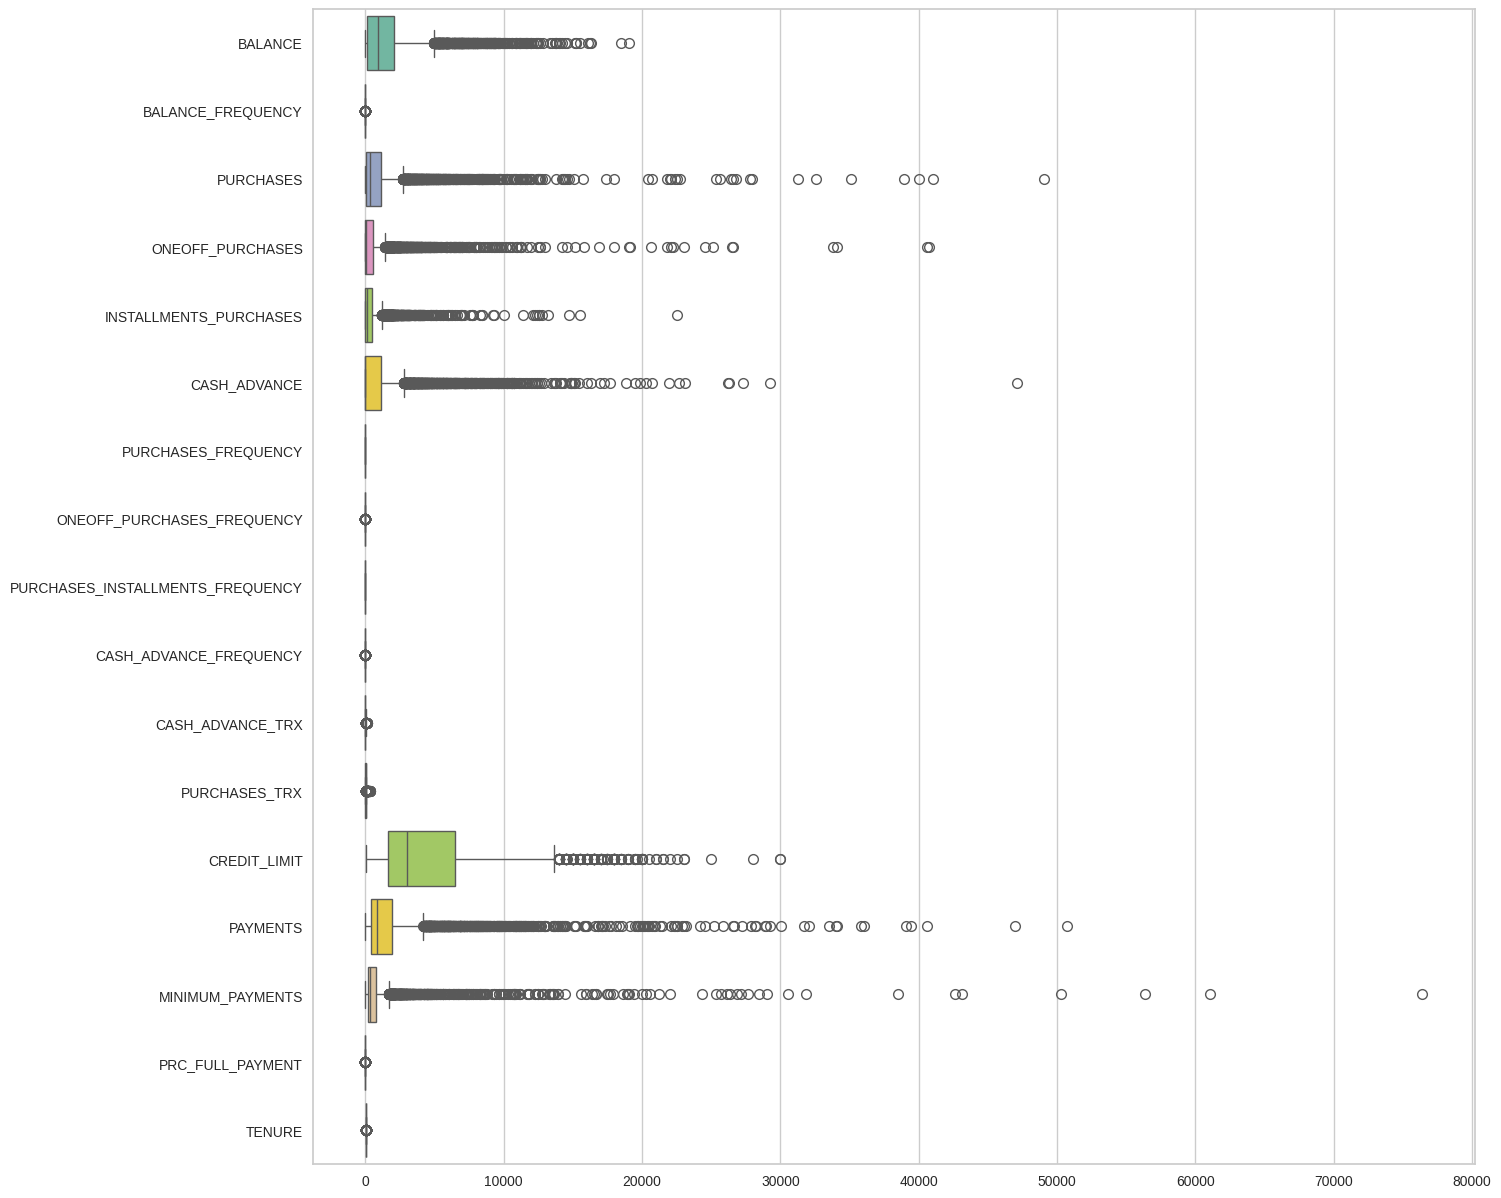

In [18]:
plt.figure(figsize=(15,15))
sns.boxplot(data=dff, orient="h", palette="Set2")

In [19]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
scaled = scaler.fit_transform(dff)
scaled.shape

(8950, 17)

In [22]:
dff.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [23]:
scaled_df = pd.DataFrame(scaled, columns=dff.columns)
scaled_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-4.445854e-17,-4.699903e-16,1.238488e-16,6.986342e-17,7.343598e-17,1.381390e-16,6.668781e-17,-2.540488e-17,-7.462683e-17,-9.804696e-17,-1.254366e-16,-2.889805e-16,-4.826927e-16,-5.716098e-17,-6.668781e-16,-6.986342e-17,7.621464e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-2.120305e+00,-1.997716e+00,-1.505149e+00,-1.000488e+00,-1.085422e+00,-9.445384e-01,-1.278866e+00,-9.033151e-01,-1.004445e+00,-8.832040e-01,-9.058009e-01,-1.387624e+00,-4.573150e+00,-2.782085e+00,-5.869902e+00,-6.778889e-01,-2.526612e+00
25%,-8.168070e-01,-5.989922e-01,-6.547989e-01,-1.000488e+00,-1.085422e+00,-9.445384e-01,-1.015926e+00,-9.033151e-01,-1.004445e+00,-8.832040e-01,-9.058009e-01,-8.727179e-01,-8.805898e-01,-6.089046e-01,-6.437446e-01,-6.778889e-01,4.222524e-01
50%,1.516813e-01,6.286119e-01,1.607696e-01,2.375163e-01,3.611963e-01,-9.445384e-01,1.196567e-01,-9.222973e-02,-2.738452e-01,-8.832040e-01,-9.058009e-01,1.432569e-01,-1.296595e-01,-6.428417e-02,-1.158118e-01,-6.778889e-01,4.222524e-01
75%,7.179130e-01,6.286119e-01,7.102506e-01,9.909450e-01,9.060999e-01,1.059052e+00,1.050283e+00,9.780771e-01,1.069884e+00,1.016910e+00,1.044342e+00,7.291175e-01,8.300851e-01,5.694526e-01,6.658903e-01,8.541173e-01,4.222524e-01
max,2.731227e+00,6.286119e-01,3.559070e+00,1.959134e+00,2.212015e+00,1.729923e+00,1.218860e+00,1.732554e+00,1.377136e+00,1.902718e+00,1.921254e+00,2.838620e+00,2.851804e+00,4.568553e+00,4.036562e+00,1.873638e+00,4.222524e-01


<Axes: >

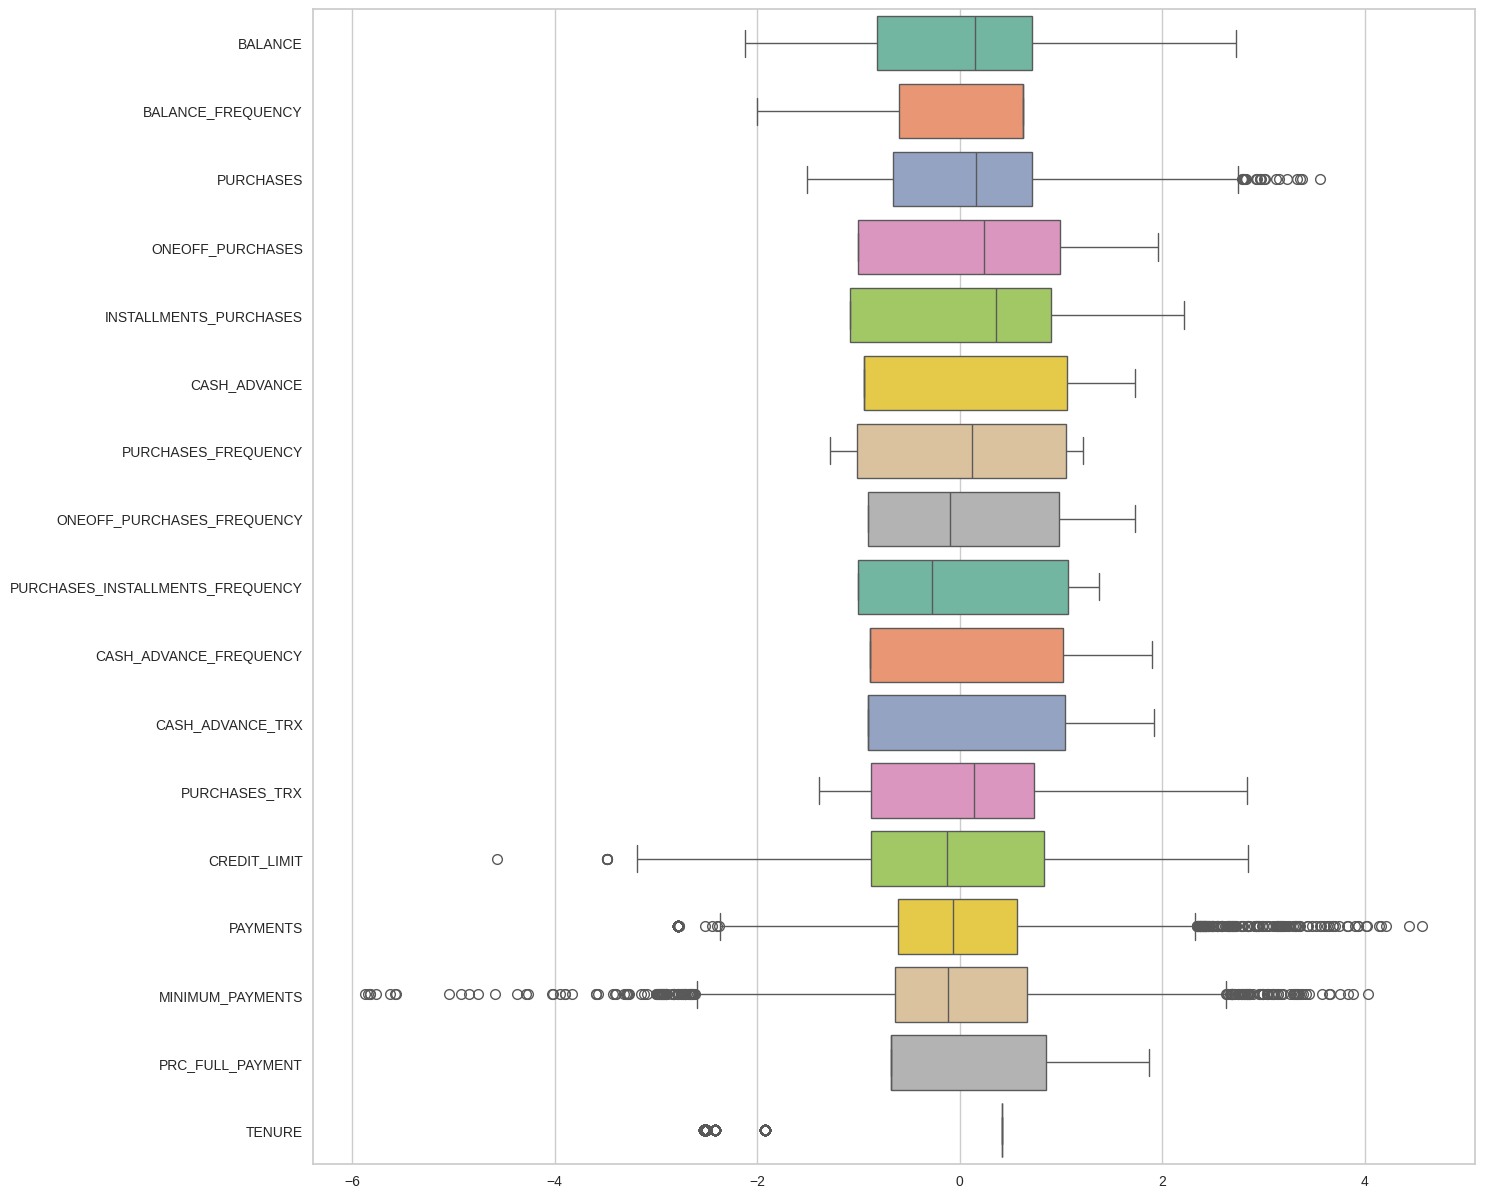

In [24]:
plt.figure(figsize=(15,15))
sns.boxplot(data=scaled_df, orient="h", palette="Set2")

# **Kmeans**

In [25]:
def kmeans(dataset,k):
    model = KMeans(n_clusters=k, random_state=42)
    kmeans_d = model.fit(dataset)
    return kmeans_d.labels_,kmeans_d.cluster_centers_

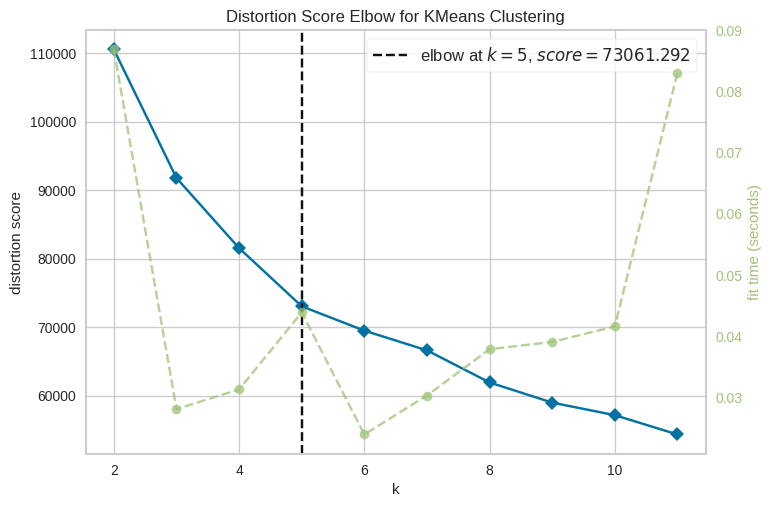

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
#Elbow method
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer.fit(scaled_df)
visualizer.show()

In [27]:
labels_kmeans,centroids=kmeans(scaled_df,5)
np.set_printoptions(threshold=sys.maxsize)
print(labels_kmeans)
print(Counter(labels_kmeans))

[2 3 4 1 2 2 4 2 4 4 2 4 4 4 3 0 1 2 4 4 2 0 2 0 3 2 3 2 0 2 0 0 3 4 4 3 3
 0 3 0 3 0 3 3 4 0 1 3 4 3 0 4 3 0 2 4 3 4 3 0 4 3 1 2 0 4 1 3 4 4 0 0 1 4
 4 4 4 2 3 0 2 1 2 2 0 4 0 0 3 3 0 0 3 2 4 3 4 3 2 1 1 2 4 2 3 0 2 3 0 0 4
 3 0 3 4 4 2 3 2 3 0 4 4 3 3 4 1 4 3 1 1 4 2 3 2 4 4 0 4 0 4 3 3 4 4 4 2 3
 4 0 0 4 2 0 4 2 0 3 4 3 3 3 4 4 2 3 2 4 2 4 1 0 2 1 0 3 0 3 4 2 4 2 3 2 4
 2 3 4 0 0 2 2 1 4 4 4 4 4 4 3 2 0 2 0 4 2 3 0 0 2 0 4 3 4 2 2 0 2 0 0 4 4
 1 4 4 2 4 4 1 4 4 2 0 3 0 4 0 0 2 4 1 4 4 1 4 2 4 2 0 4 0 2 2 4 3 2 2 0 4
 3 4 0 0 0 4 4 4 4 4 0 4 3 4 4 0 2 3 2 4 0 4 0 4 4 3 3 3 0 4 3 4 0 4 3 2 4
 3 3 4 4 0 4 3 4 3 4 4 4 1 2 4 0 4 3 3 1 1 4 2 2 3 0 3 4 3 2 4 0 3 4 3 4 4
 4 3 3 2 4 2 4 3 0 3 1 4 2 4 4 0 2 3 4 0 2 2 4 4 3 1 3 4 3 4 0 3 2 4 4 3 3
 4 0 1 4 4 2 4 2 2 3 3 3 3 2 4 1 3 3 2 2 2 4 0 0 2 3 4 1 3 0 4 2 0 4 3 4 2
 3 3 4 1 4 2 3 2 4 4 4 2 0 0 3 3 4 0 0 3 1 3 3 3 0 4 3 3 3 0 0 3 0 2 3 3 2
 4 0 4 4 3 2 4 4 0 0 0 2 2 4 0 0 4 4 4 0 3 3 4 2 0 4 3 3 4 3 2 4 0 4 3 4 2
 4 3 1 4 4 3 4 0 4 0 3 4 

In [28]:
silhouette_score(scaled_df,labels_kmeans)

0.2112902336729656

# **Agglomerative**

In [29]:
def dendo(data,method,metric):
    plt.figure(figsize=(10, 7))
    plt.title("Counters Dendograms")
    return shc.dendrogram(shc.linkage(y=data , method=method,metric=metric),orientation='top')

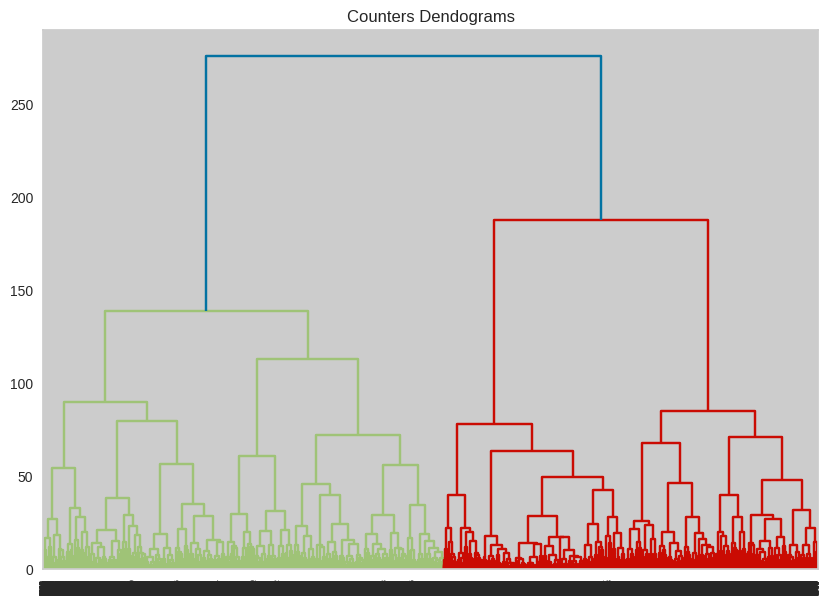

In [30]:
dend=dendo(scaled_df,'ward','euclidean')

In [31]:
def Agglomerative(n_clus,linkage,affinity,d):
    hc = AgglomerativeClustering(n_clusters = n_clus, affinity = affinity, linkage = linkage)
    y_hc = hc.fit_predict(d)
    return(y_hc)

In [33]:
def Agglomerative(n_clus,linkage,d): #affinity removed from arguments
    #If linkage is 'ward' affinity is automatically set to 'euclidean'
    hc = AgglomerativeClustering(n_clusters = n_clus, linkage = linkage)
    y_hc = hc.fit_predict(d)
    return(y_hc)
y_hc=Agglomerative(3,'ward',scaled_df) #affinity is not passed here
y_hc

array([0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2,
       0, 2, 1, 2, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0,
       2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1,
       1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1,
       0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2, 1, 2,
       2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 2,
       2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1,

In [34]:
print(Counter(y_hc))

Counter({0: 4633, 1: 2226, 2: 2091})


In [35]:
silhouette_score(scaled_df, y_hc, metric='euclidean')

0.22025948389041475

# **DBSCAN**

In [36]:
def dbscan(data):
    for i in np.arange (1.5,5, 0.1):
        for j in range (25,44):
            clusters = DBSCAN(eps = i, min_samples = j).fit(data)
            if len(set(clusters.labels_))!=1:
                print(f"eps is {i}, min_sam is {j} ")
                #print(clusters.labels_)
                print(Counter(clusters.labels_))
                print(silhouette_score(data,clusters.labels_))
                print("\n")

In [37]:
dbscan(scaled_df)
#best: eps is1.7000000000000002, min_sam is 25
# silhouette_score:0.07320169973513564

eps is 1.5, min_sam is 25 
Counter({0: 3343, -1: 2322, 1: 2117, 3: 503, 2: 312, 5: 200, 4: 153})
0.023141064570001903


eps is 1.5, min_sam is 26 
Counter({0: 3328, -1: 2354, 1: 2110, 3: 498, 2: 312, 5: 199, 4: 149})
0.021590327087184946


eps is 1.5, min_sam is 27 
Counter({0: 3325, -1: 2382, 1: 2095, 3: 491, 2: 311, 5: 197, 4: 149})
0.020688249704143152


eps is 1.5, min_sam is 28 
Counter({0: 3293, -1: 2437, 1: 1869, 3: 484, 2: 311, 4: 197, 6: 193, 5: 148, 7: 18})
-0.02635101258317383


eps is 1.5, min_sam is 29 
Counter({0: 3267, -1: 2478, 1: 1861, 3: 481, 2: 311, 4: 195, 6: 193, 5: 147, 7: 17})
-0.02529586983894818


eps is 1.5, min_sam is 30 
Counter({0: 3257, -1: 2528, 1: 1860, 3: 475, 2: 306, 6: 189, 4: 188, 5: 147})
0.015537890604501337


eps is 1.5, min_sam is 31 
Counter({0: 3251, -1: 2556, 1: 1851, 3: 470, 2: 306, 6: 188, 4: 182, 5: 146})
0.013979764292734736


eps is 1.5, min_sam is 32 
Counter({0: 3191, -1: 2581, 1: 1843, 3: 469, 2: 306, 6: 187, 4: 181, 5: 146, 7: 46})
-0

In [40]:
!pip install kneed

In [41]:
from kneed import KneeLocator
def get_best_eps(data,k):

    nn = NearestNeighbors()

    nn.fit(data)

    distances, neighbors = nn.kneighbors(data)

    # sort the distances
    distances = np.sort(distances[:, k], axis = 0)

    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

    fig = plt.figure(figsize=(5, 5))
    knee.plot_knee()
    plt.xlabel("Points")
    plt.ylabel("Distance")

<Figure size 500x500 with 0 Axes>

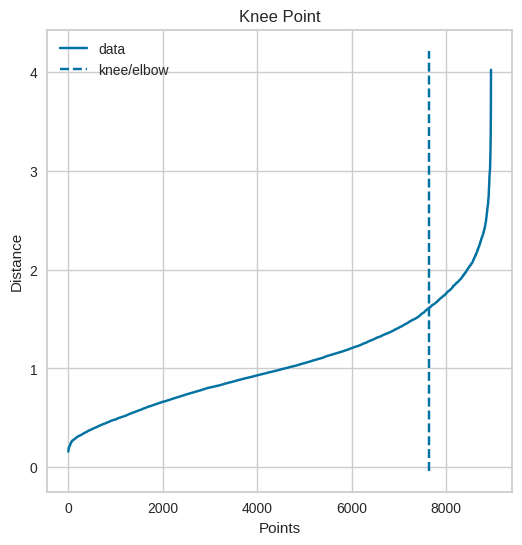

In [42]:
get_best_eps(scaled_df,4)

### GaussianMixture

In [43]:
def gaussian_mixture_k(data):

    n_range = range(2,11)

    # Create empty lists to store the BIC and AIC values
    bic_score = []
    aic_score = []

    # Loop through the range and fit a model
    for n in n_range:
        gm = GaussianMixture(n_components=n,
                             random_state=123,
                             n_init=10)
        gm.fit(data)

        # Append the BIC and AIC to the respective lists
        bic_score.append(gm.bic(data))
        aic_score.append(gm.aic(data))

    # Plot the BIC and AIC values together
    fig, ax = plt.subplots(figsize=(12,8),nrows=1)
    ax.plot(n_range, bic_score, '-o', color='orange')
    ax.plot(n_range, aic_score, '-o', color='green')
    ax.set(xlabel='Number of Clusters', ylabel='Score')
    ax.set_xticks(n_range)
    ax.set_title('BIC and AIC Scores Per Number Of Clusters')

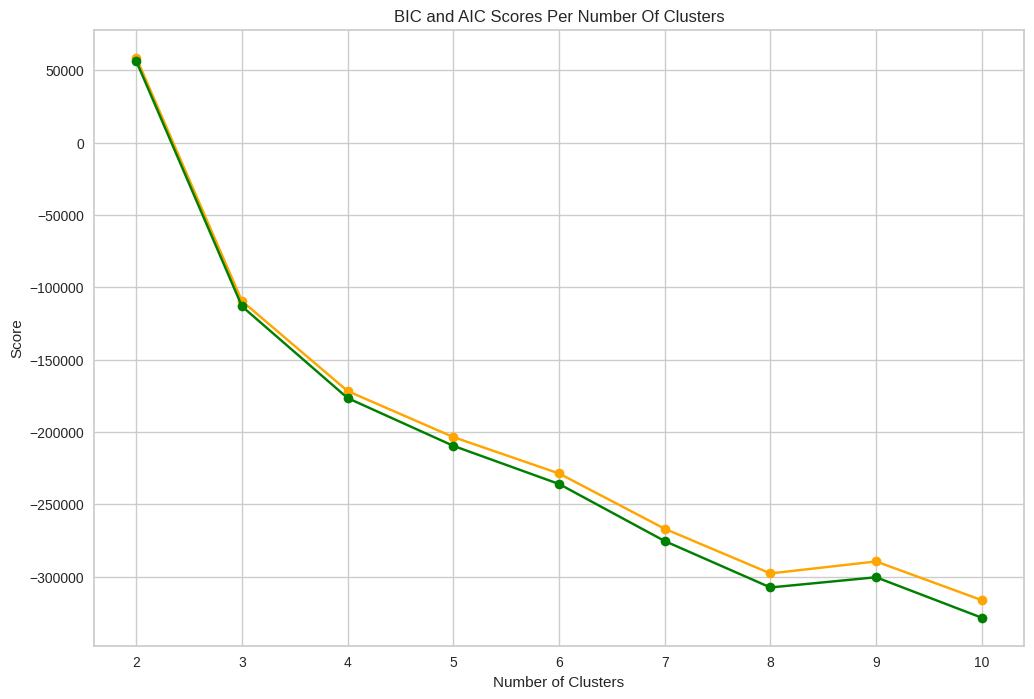

In [44]:
gaussian_mixture_k(scaled_df)

In [45]:
def gaussian_mixture(data,k):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(data)
    labels = gmm.predict(data)
    print(Counter(labels))
    print(silhouette_score(data,labels))
    return labels

In [46]:
labels=gaussian_mixture(scaled_df,5)

Counter({2: 2825, 4: 1961, 0: 1923, 3: 1799, 1: 442})
0.1865623387204916


# pca

In [47]:
scaler =StandardScaler()

features =scaler.fit(dff)
features =features.transform(dff)
s_df =pd.DataFrame(features,columns=dff.columns)
s_df.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [48]:
X=s_df.values
pca=PCA(n_components=2)
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
reduced_X.head()

,PCA1,PCA2
0,-1.683649,-1.072241
1,-1.134085,2.509150
2,0.969395,-0.383577
3,-0.888220,0.004648
4,-1.600021,-0.683795


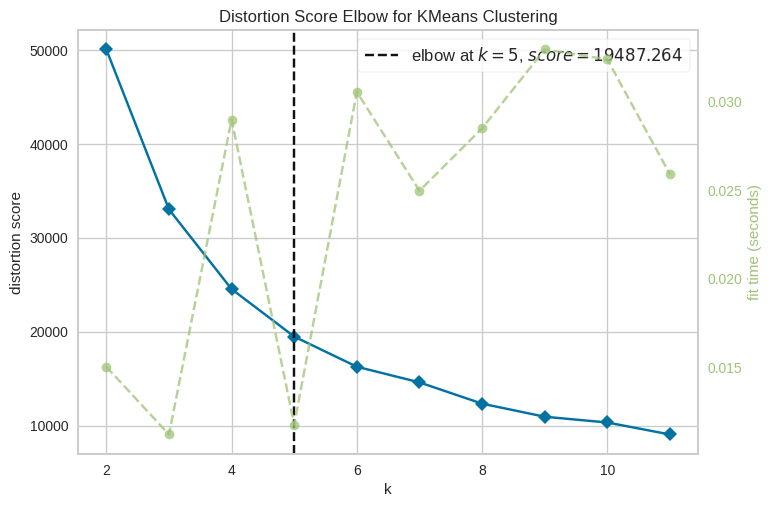

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer.fit(reduced_X)
visualizer.show()

### Kmeans_pca

In [50]:
kmeans(reduced_X,5)

(array([4, 0, 1, 4, 4, 1, 3, 1, 1, 4, 1, 1, 3, 1, 4, 0, 4, 1, 1, 1, 1, 3,
        1, 0, 4, 1, 4, 1, 0, 1, 0, 1, 0, 1, 3, 4, 0, 3, 0, 0, 4, 1, 4, 4,
        3, 4, 4, 4, 3, 4, 0, 1, 4, 1, 1, 4, 4, 3, 4, 4, 4, 4, 0, 4, 3, 1,
        4, 4, 1, 1, 4, 0, 4, 1, 4, 1, 1, 1, 4, 0, 1, 4, 1, 1, 3, 3, 0, 0,
        4, 0, 3, 0, 4, 4, 4, 4, 1, 4, 1, 4, 4, 1, 3, 1, 4, 4, 1, 0, 1, 0,
        1, 4, 3, 0, 1, 1, 1, 4, 1, 4, 2, 4, 3, 4, 0, 2, 4, 1, 0, 4, 4, 3,
        1, 0, 1, 1, 3, 1, 2, 1, 4, 4, 0, 3, 3, 4, 1, 4, 1, 1, 3, 3, 1, 2,
        3, 1, 0, 4, 2, 4, 4, 4, 1, 4, 1, 4, 1, 3, 1, 1, 4, 2, 4, 4, 3, 4,
        1, 0, 3, 1, 3, 4, 0, 4, 1, 1, 4, 1, 4, 4, 4, 4, 4, 3, 1, 3, 3, 3,
        4, 0, 4, 4, 1, 0, 2, 4, 4, 0, 0, 1, 0, 1, 4, 1, 4, 4, 1, 4, 0, 3,
        2, 3, 4, 3, 3, 4, 3, 3, 4, 2, 1, 3, 1, 4, 3, 1, 0, 4, 4, 1, 0, 1,
        3, 4, 3, 4, 3, 1, 0, 3, 0, 1, 1, 3, 4, 1, 4, 3, 3, 4, 1, 3, 3, 2,
        1, 3, 3, 1, 4, 3, 3, 0, 3, 2, 0, 4, 4, 4, 1, 1, 3, 1, 1, 3, 4, 0,
        4, 4, 1, 4, 3, 0, 4, 0, 1, 3, 

In [51]:
labels_kmeans_pca,centroids_pca=kmeans(reduced_X,5)
np.set_printoptions(threshold=sys.maxsize)
print(labels_kmeans_pca)
print(Counter(labels_kmeans_pca))

[4 0 1 4 4 1 3 1 1 4 1 1 3 1 4 0 4 1 1 1 1 3 1 0 4 1 4 1 0 1 0 1 0 1 3 4 0
 3 0 0 4 1 4 4 3 4 4 4 3 4 0 1 4 1 1 4 4 3 4 4 4 4 0 4 3 1 4 4 1 1 4 0 4 1
 4 1 1 1 4 0 1 4 1 1 3 3 0 0 4 0 3 0 4 4 4 4 1 4 1 4 4 1 3 1 4 4 1 0 1 0 1
 4 3 0 1 1 1 4 1 4 2 4 3 4 0 2 4 1 0 4 4 3 1 0 1 1 3 1 2 1 4 4 0 3 3 4 1 4
 1 1 3 3 1 2 3 1 0 4 2 4 4 4 1 4 1 4 1 3 1 1 4 2 4 4 3 4 1 0 3 1 3 4 0 4 1
 1 4 1 4 4 4 4 4 3 1 3 3 3 4 0 4 4 1 0 2 4 4 0 0 1 0 1 4 1 4 4 1 4 0 3 2 3
 4 3 3 4 3 3 4 2 1 3 1 4 3 1 0 4 4 1 0 1 3 4 3 4 3 1 0 3 0 1 1 3 4 1 4 3 3
 4 1 3 3 2 1 3 3 1 4 3 3 0 3 2 0 4 4 4 1 1 3 1 1 3 4 0 4 4 1 4 3 0 4 0 1 3
 4 0 1 1 4 3 0 1 0 3 1 1 4 1 1 3 3 4 4 4 0 1 1 1 0 0 0 4 0 1 3 1 4 3 4 1 3
 3 0 0 4 3 1 3 4 0 4 4 3 1 1 1 0 1 4 3 0 4 4 3 3 0 4 4 1 4 1 0 4 1 4 3 0 0
 3 3 4 3 1 4 3 1 4 4 0 4 4 4 3 4 4 0 1 1 4 1 1 2 1 4 1 4 0 1 1 1 0 3 0 1 1
 4 0 1 4 3 4 0 1 3 0 3 1 3 1 4 4 3 0 4 4 4 0 0 0 0 4 4 4 0 1 3 4 0 4 0 4 1
 3 3 1 4 4 1 1 3 3 0 1 1 1 1 4 3 1 3 1 1 4 0 1 1 3 1 0 4 3 4 4 4 1 3 4 4 1
 3 0 4 3 3 0 3 0 1 3 0 3 

In [52]:
silhouette_score(reduced_X,labels_kmeans_pca)

0.3982149960433367

In [53]:
def plotting_k(uniqelabels,centroids,labels_kmeans,d):
    for i in uniqelabels:


        plt.scatter(d[labels_kmeans == i ].PCA1 , d[labels_kmeans == i ].PCA2)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    plt.show()

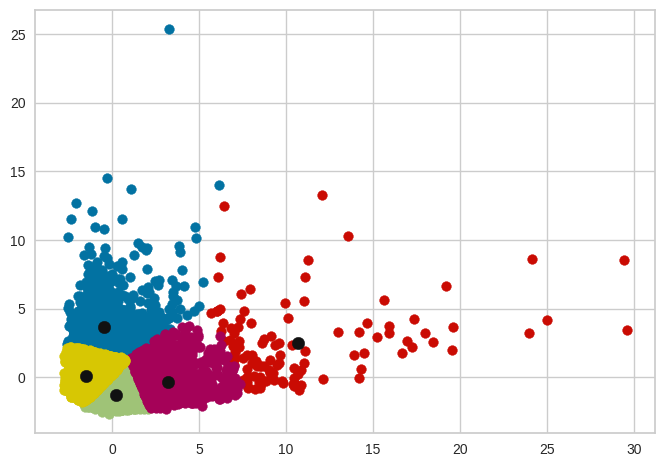

In [54]:
u_labels = np.unique(labels_kmeans_pca)
plotting_k(u_labels,centroids_pca,labels_kmeans_pca,reduced_X)

### Agglomerative_pca

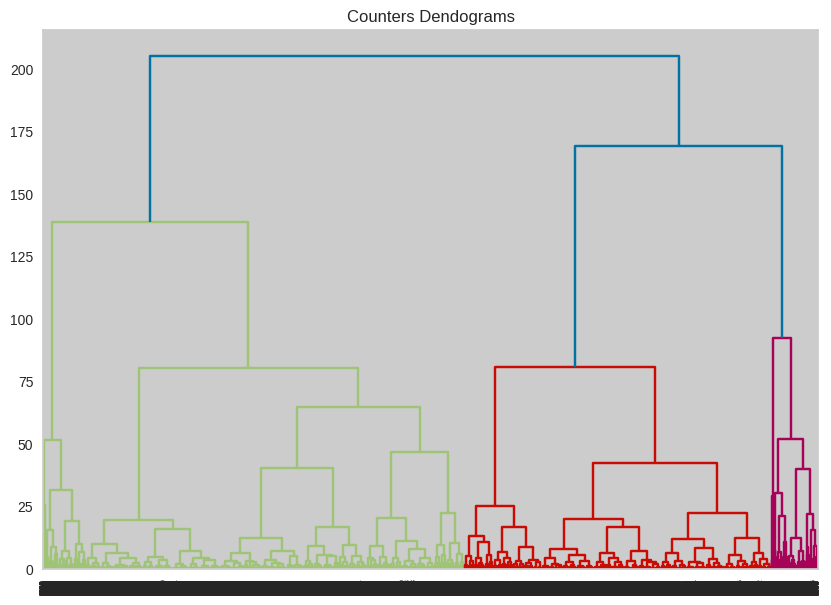

In [55]:
dend=dendo(reduced_X,'ward','euclidean')

In [59]:
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
from sklearn.metrics import silhouette_score

def Agglomerative(n_clusters, linkage, X):
    """
    Performs agglomerative clustering on the given data.
    This is a wrapper around AgglomerativeClustering from sklearn.cluster

    Args:
        n_clusters (int): The number of clusters to form.
        linkage (str): Which linkage criterion to use.
                       Can be “ward”, “complete”, “average”, or “single”.
        X (array-like): The data to cluster.

    Returns:
        array-like: Cluster labels for each data point.
    """
    # Instantiate the AgglomerativeClustering object, removing the affinity argument
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)

    # Fit the model and obtain cluster labels
    labels = clustering.fit_predict(X)

    return labels

# Example usage
y_hc_pca = Agglomerative(3, 'ward', reduced_X)
print(Counter(y_hc_pca))
silhouette_score(reduced_X, y_hc_pca, metric='euclidean')

Counter({0: 4868, 2: 3547, 1: 535})


0.35166243846031264

### DBSCAN_pca

In [60]:
dbscan(reduced_X)
# eps is 1.8, min_sam is 25
# silhouette_score:0.7946141352739808

eps is 1.5, min_sam is 25 
Counter({0: 8870, -1: 80})
0.7673430512654762


eps is 1.5, min_sam is 26 
Counter({0: 8868, -1: 82})
0.7657092763574079


eps is 1.5, min_sam is 27 
Counter({0: 8867, -1: 83})
0.7652195388654985


eps is 1.5, min_sam is 28 
Counter({0: 8867, -1: 83})
0.7652195388654985


eps is 1.5, min_sam is 29 
Counter({0: 8866, -1: 84})
0.7640928490653942


eps is 1.5, min_sam is 30 
Counter({0: 8864, -1: 86})
0.7632137068090136


eps is 1.5, min_sam is 31 
Counter({0: 8862, -1: 88})
0.7619191657173727


eps is 1.5, min_sam is 32 
Counter({0: 8858, -1: 92})
0.7582786505767357


eps is 1.5, min_sam is 33 
Counter({0: 8854, -1: 96})
0.7567090890551944


eps is 1.5, min_sam is 34 
Counter({0: 8854, -1: 96})
0.7567090890551944


eps is 1.5, min_sam is 35 
Counter({0: 8852, -1: 98})
0.755767397172579


eps is 1.5, min_sam is 36 
Counter({0: 8851, -1: 99})
0.7552942967520825


eps is 1.5, min_sam is 37 
Counter({0: 8850, -1: 100})
0.7548098909304878


eps is 1.5, min_sam is 38

In [67]:
def plot_db(eps,min_samples,d):
    clusters = DBSCAN(eps = eps, min_samples = min_samples).fit(d)

    p = sns.scatterplot(data = d, x = d['PCA1'], y = d['PCA2'], hue = clusters.labels_, legend = "full", palette = "tab10")
    sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
    plt.show()

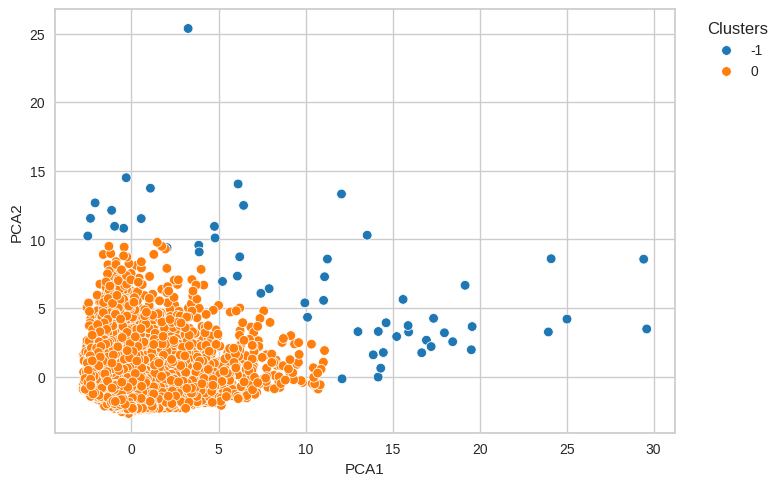

In [68]:
plot_db(1.8,25,reduced_X)

### Gaussian_Mixture_pca

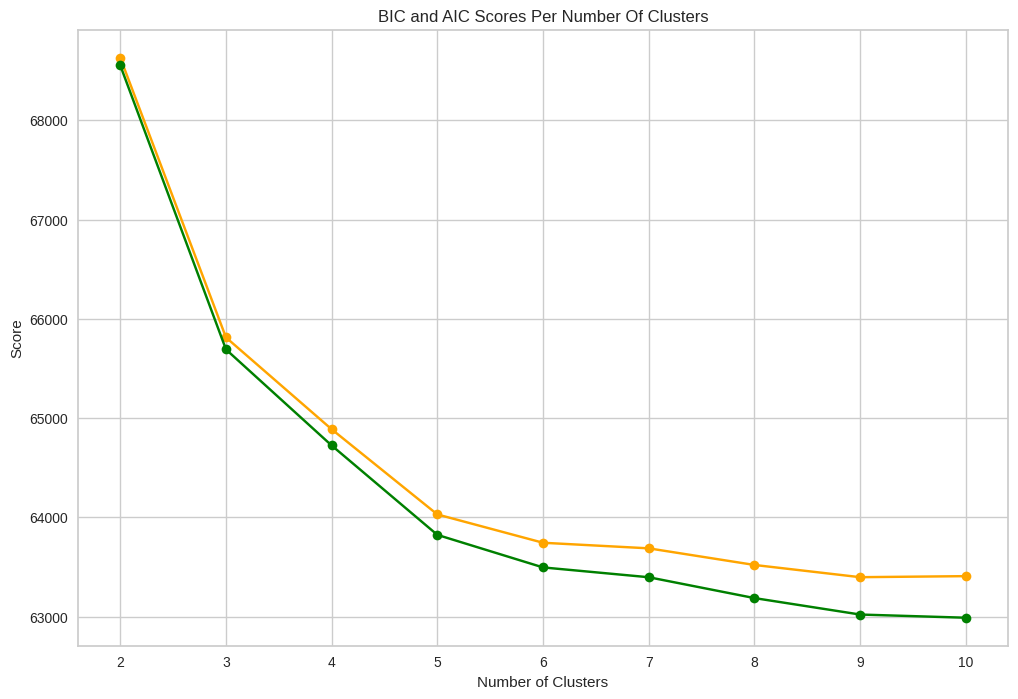

In [69]:
gaussian_mixture_k(reduced_X)

In [70]:
labels_pca=gaussian_mixture(reduced_X,5)

Counter({0: 3687, 3: 2801, 1: 1197, 2: 1049, 4: 216})
0.3547838926785949


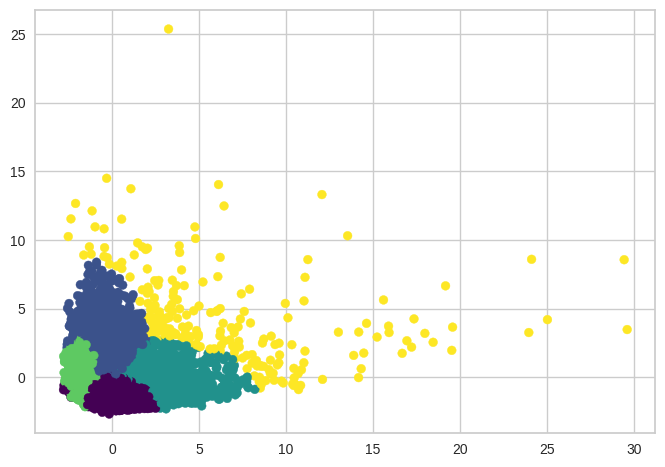

In [71]:
plt.scatter(reduced_X.PCA1, reduced_X.PCA2, c=labels_pca, s=40, cmap='viridis')